In [ ]:
##Author Keerthi Ningegowda
##Master's in Computer Science with Big Data concentration
##Simon Fraser University
##Burnaby, BC
##Student Number: 301400275
##Last modified: April 17 2020

In [13]:
##Importing tsfresh libraries and data

from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction.settings import ComprehensiveFCParameters,EfficientFCParameters
from tsfresh.feature_extraction.settings import from_columns

import numpy as np
import pandas as pd

In [54]:
#Adding index to the data
df = pd.read_csv('C:/Users/Keerthi Ningegowda/Desktop/bd2_data/nor_data.csv')
df['id'] = df.index

In [57]:
new_df = df[['id','Value']]
type(new_df)

pandas.core.frame.DataFrame

In [59]:
##Performing Z-normalization

Zscale = new_df['Value'].values
Zscale = Zscale.reshape(-1,1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True,with_std=True)
new_df['Zscale'] = scaler.fit_transform(Zscale)

C:\Users\Keerthi Ningegowda\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [60]:
Zscale = new_df['Zscale'].values

In [61]:
##Applying a low pass filter

movAvg = pd.DataFrame(data=Zscale,
                     columns = ['Zmovavg'])
movAvg = movAvg.rolling(window=1).mean().dropna()

In [62]:
new_df['movAvg'] = movAvg['Zmovavg']
new_df

,id,Value,Zscale,movAvg
0,0,0.789063,0.132299,0.132299
1,1,0.785156,-0.146304,-0.146304
2,2,0.785156,-0.146304,-0.146304
3,3,0.789063,0.132299,0.132299
4,4,0.785156,-0.146304,-0.146304
...,...,...,...,...
3733,3733,0.773438,-0.981899,-0.981899
3734,3734,0.800781,0.967893,0.967893
3735,3735,0.796875,0.689362,0.689362
3736,3736,0.761719,-1.817565,-1.817565


In [63]:
##Generating EfficientFCParameters object
settings_minimal = EfficientFCParameters()
settings_minimal

{'variance_larger_than_standard_deviation': None,
 'has_duplicate_max': None,
 'has_duplicate_min': None,
 'has_duplicate': None,
 'sum_values': None,
 'abs_energy': None,
 'mean_abs_change': None,
 'mean_change': None,
 'mean_second_derivative_central': None,
 'median': None,
 'mean': None,
 'length': None,
 'standard_deviation': None,
 'variance': None,
 'skewness': None,
 'kurtosis': None,
 'absolute_sum_of_changes': None,
 'longest_strike_below_mean': None,
 'longest_strike_above_mean': None,
 'count_above_mean': None,
 'count_below_mean': None,
 'last_location_of_maximum': None,
 'first_location_of_maximum': None,
 'last_location_of_minimum': None,
 'first_location_of_minimum': None,
 'percentage_of_reoccurring_datapoints_to_all_datapoints': None,
 'percentage_of_reoccurring_values_to_all_values': None,
 'sum_of_reoccurring_values': None,
 'sum_of_reoccurring_data_points': None,
 'ratio_value_number_to_time_series_length': None,
 'maximum': None,
 'minimum': None,
 'time_reversal_

In [64]:
##Data preparation for feature generation

final_df = pd.DataFrame(columns=['id','movAvg'])

final_df['id'] = new_df['id']
final_df['movAvg'] = new_df['movAvg']

In [65]:
##Feature engineering using tsfresh

X_tsfresh = extract_features(final_df, column_id="id", default_fc_parameters = settings_minimal)
X_tsfresh.head()

Feature Extraction: 100%|██████████| 15/15 [00:58<00:00,  3.91s/it]


variable,movAvg__abs_energy,movAvg__absolute_sum_of_changes,"movAvg__agg_autocorrelation__f_agg_""mean""__maxlag_40","movAvg__agg_autocorrelation__f_agg_""median""__maxlag_40","movAvg__agg_autocorrelation__f_agg_""var""__maxlag_40","movAvg__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","movAvg__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","movAvg__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","movAvg__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","movAvg__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,movAvg__symmetry_looking__r_0.9,movAvg__symmetry_looking__r_0.9500000000000001,movAvg__time_reversal_asymmetry_statistic__lag_1,movAvg__time_reversal_asymmetry_statistic__lag_2,movAvg__time_reversal_asymmetry_statistic__lag_3,movAvg__value_count__value_-1,movAvg__value_count__value_0,movAvg__value_count__value_1,movAvg__variance,movAvg__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
0,0.017503,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.021405,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.021405,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.017503,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.021405,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


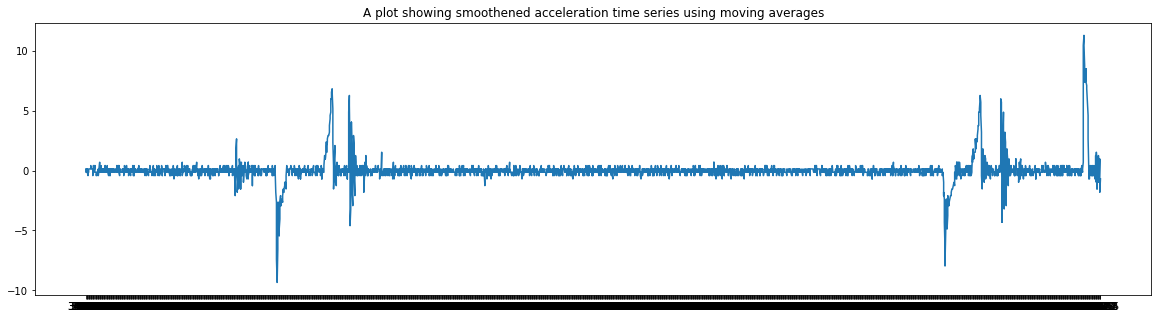

In [66]:
##Example 1
##Plot showing the denoised data 
##This plot contains only acceleration feature

import matplotlib.pyplot as plt

plt.plot(df['Pos'],new_df['movAvg'])
plt.title('A plot showing smoothened acceleration time series using moving averages')
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

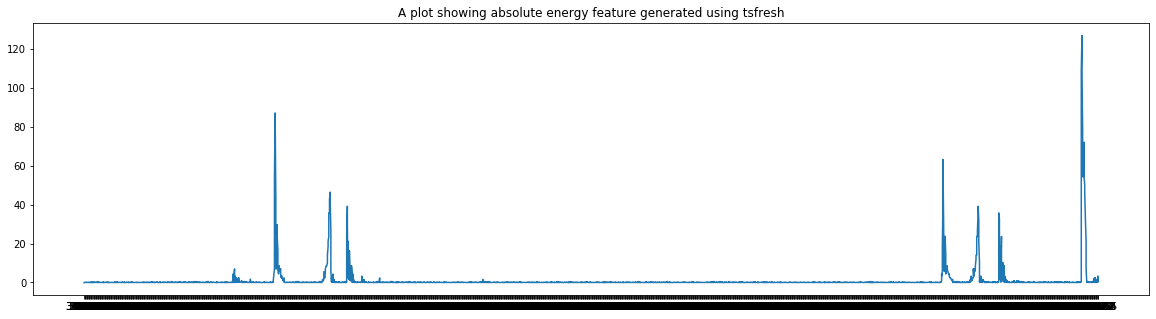

In [67]:
##Plot showing energy feature generated by tsfresh for the above acceleration values

plt.plot(df['Pos'],X_tsfresh['movAvg__abs_energy'])
plt.title('A plot showing absolute energy feature generated using tsfresh')
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

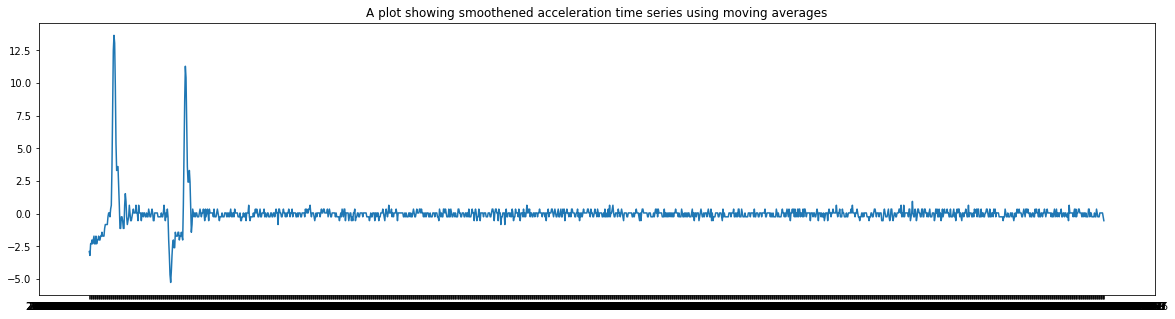

In [49]:
##Example 2
##Plot showing the denoised data 
##This plot contains only acceleration feature

plt.plot(df['timestamp'],new_df['movAvg'])
plt.title('A plot showing smoothened acceleration time series using moving averages')
plt.rcParams["figure.figsize"] = (20,5)
plt.show()



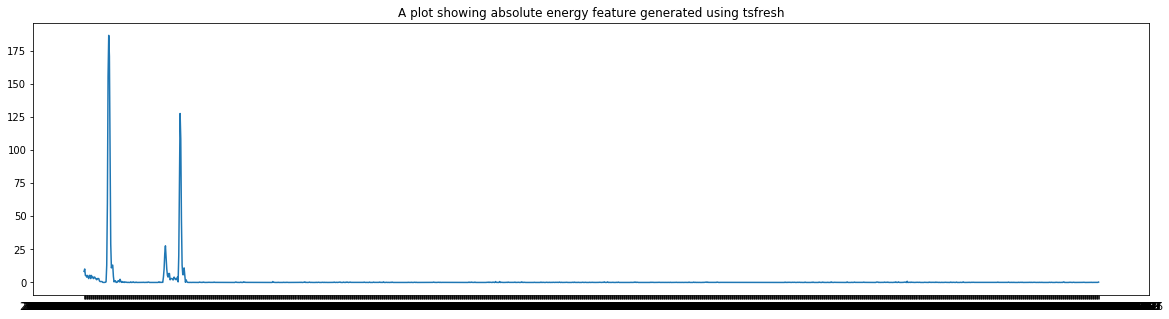

In [50]:
##Plot showing energy feature generated by tsfresh for the above acceleration values

plt.plot(df['timestamp'],X_tsfresh['movAvg__abs_energy'])
plt.title('A plot showing absolute energy feature generated using tsfresh')
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

In [51]:
settings_minimal = ComprehensiveFCParameters()
settings_minimal

{'variance_larger_than_standard_deviation': None,
 'has_duplicate_max': None,
 'has_duplicate_min': None,
 'has_duplicate': None,
 'sum_values': None,
 'abs_energy': None,
 'mean_abs_change': None,
 'mean_change': None,
 'mean_second_derivative_central': None,
 'median': None,
 'mean': None,
 'length': None,
 'standard_deviation': None,
 'variance': None,
 'skewness': None,
 'kurtosis': None,
 'absolute_sum_of_changes': None,
 'longest_strike_below_mean': None,
 'longest_strike_above_mean': None,
 'count_above_mean': None,
 'count_below_mean': None,
 'last_location_of_maximum': None,
 'first_location_of_maximum': None,
 'last_location_of_minimum': None,
 'first_location_of_minimum': None,
 'percentage_of_reoccurring_datapoints_to_all_datapoints': None,
 'percentage_of_reoccurring_values_to_all_values': None,
 'sum_of_reoccurring_values': None,
 'sum_of_reoccurring_data_points': None,
 'ratio_value_number_to_time_series_length': None,
 'sample_entropy': None,
 'maximum': None,
 'minimum